In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [18]:
df = pd.read_csv('data/student.csv')

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
# Seperating independent variables 
X = df.drop('math_score', axis=1)

In [21]:
# Dependent(output) variable
y = df['math_score']

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


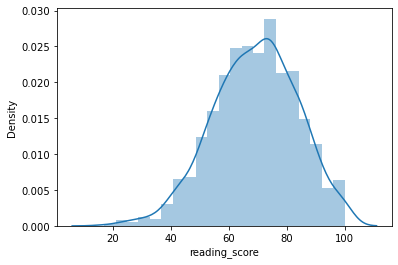

In [22]:
sns.distplot(df['reading_score'])
plt.show()

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


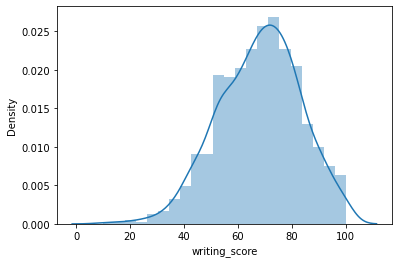

In [23]:
sns.distplot(df['writing_score'])
plt.show()

In [24]:
# Column transformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

standard_scaler = StandardScaler()
oh_encoder      =  OneHotEncoder()

col_trans = ColumnTransformer(
    [
        ('OneHotEncoder', oh_encoder, cat_features),
        ('StandardScaler', standard_scaler, num_features)
    ]
)

# Applying column transformer on categorical and numerical data 
X = col_trans.fit_transform(X)

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


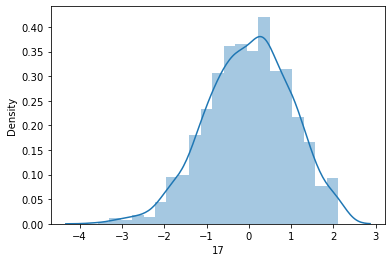

In [25]:
# Checking the distribution of numerical column after normalization
temp_df = pd.DataFrame(X)
# Reading score distribution after standard scaling
sns.distplot(temp_df[17])
plt.show()

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


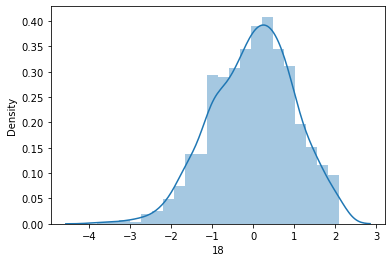

In [26]:
# Checking the distribution of numerical column after normalization
temp_df = pd.DataFrame(X)
# Writing score distribution after standard scaling
sns.distplot(temp_df[18])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(800, 19)
(200, 19)


In [28]:
def model_performance_data(true, predicted):
    mae    = mean_absolute_error(true, predicted)
    mse    = mean_squared_error(true, predicted)
    rmse   = np.sqrt(mean_squared_error(true, predicted))
    r2_scr = r2_score(true, predicted)
    return mae, mse, rmse, r2_scr 

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list    = []
r2_score_list = []

for key in models:
    
    model = models[key]
    
    # Training the model 
    model.fit(X_train, y_train)
    
    # Predicting on test data 
    y_pred = model.predict(X_test)
    
    r2_score_value = model_performance_data(y_test, y_pred)
    model_list.append(key)
    r2_score_list.append(r2_score_value[3])
    print(f"Model name: {key} \nModel performance: \n\tMean Absolute error: {r2_score_value[0]} \n\tMean Squared error: {r2_score_value[1]} \n\tRoot Mean Squared error: {r2_score_value[2]} \n\tr2_score: {r2_score_value[3]} \n")
    print("-------------------------------------------------------------------")


Model name: Linear Regression 
Model performance: 
	Mean Absolute error: 4.214763142474852 
	Mean Squared error: 29.095169866715523 
	Root Mean Squared error: 5.393993869732846 
	r2_score: 0.8804332983749563 

-------------------------------------------------------------------
Model name: Lasso 
Model performance: 
	Mean Absolute error: 5.157881810347763 
	Mean Squared error: 42.506416838411624 
	Root Mean Squared error: 6.519694535667421 
	r2_score: 0.8253197323627852 

-------------------------------------------------------------------
Model name: Ridge 
Model performance: 
	Mean Absolute error: 4.21110068801426 
	Mean Squared error: 29.056272192348292 
	Root Mean Squared error: 5.390387016935638 
	r2_score: 0.8805931485028738 

-------------------------------------------------------------------
Model name: K-Neighbors Regressor 
Model performance: 
	Mean Absolute error: 5.609 
	Mean Squared error: 52.553799999999995 
	Root Mean Squared error: 7.249399975170358 
	r2_score: 0.78402997

In [38]:
# Creating a datafrome with model name and r2 score
# list(zip(model_list, r2_score_list))
df2 = pd.DataFrame(list(zip(model_list, r2_score_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)
df2

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853567
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848105
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.754971


In [43]:
# Using linear model
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
score  = r2_score(y_test, y_pred)
print("Accuracy score of model: %.2f" %score)

Accuracy score of model: 0.88


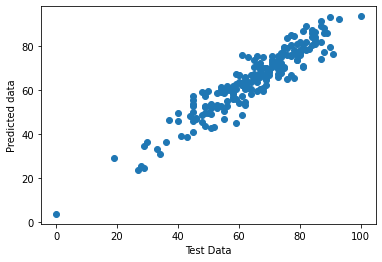

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted data")
plt.show()

<AxesSubplot:xlabel='math_score'>

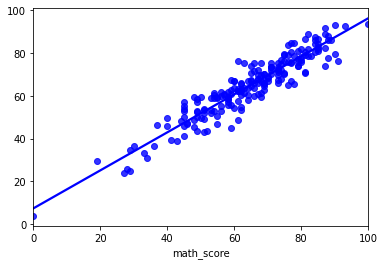

In [45]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='blue')

In [47]:
pred_diff_df = pd.DataFrame({'test_data':y_test, 'pred_data':y_pred, 'difference': y_test - y_pred })
pred_diff_df

,test_data,pred_data,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
